# 4.17.41 Hypothesis Testing

### Design of Experiments

The idea of **[design of experiments](https://en.wikipedia.org/wiki/Design_of_experiments)** has its origins in traditional statistics and it has applications in many areas of research. The idea is to appropriately **design an experiment in order to confirm or reject a hypothesis**. 

Data analysts and data scientists are often faced with the need to conduct experiments regarding user interfaces, product marketing, pricing and so on. Something to keep in mind is that statistical testing should always be used to confirm or reject a hypothesis, not to find confirmation in one's ideas or gut feel; as the scottish poet Andrew Lang wisely said: 

> He uses statistics as a drunken man uses lamp-posts... for support rather than illumination. 

This is roughly how the process works: 

1. you formulate a hypothesis, such as “drug A is better than the existing standard drug” or, in a business context, “this new landing page generates more conversions than the existing one”;
2. an experiment (such as an **A/B test**) is designed specifically to test the hypothesis; 
3. you start collecting the relevant data and analyze it; 
4. a conclusion is inferred based on the results. 

<img src="img/inference-pipeline.png" width="900">

The term **[inference](https://en.wikipedia.org/wiki/Statistical_inference)** reflects the fact that we want to generalise the experiment results, which involve a limited set of data (like a randomly chosen subset of customers), to a larger population (all the customers). 

A well conducted experiment should be well planned and documented, the objective metric should be chosen carefully and in case of an **[AB test](https://en.wikipedia.org/wiki/A/B_testing)**, particular care should be taken in the randomisation of test and control groups as well as the aving reached a large enough sample size. 

### Tests of Hypothesis

The definition on Wikipedia says that: 

> A **[statistical hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)** is a method of statistical inference used to decide whether the data at hand sufficiently **support a particular hypothesis**. Hypothesis testing allows us to make **probabilistic statements about population** parameters.

It should be clear from the previous chapter that we should test something only after we have duly formulated a hypothesis and designed the process that defines the experiment so that the test's conclusions can be considered valid and reliable. 

At the last step of our design of experiment process, after we have collected the data, it's time to **test whether our hypothesis is validated by the data** or not. It turns out that there are **different tests** that can be conducted depending on the type of phenomena we are measuring; the following flowchart can help us distinguish all the various cases: 

<img src="img/hyp-test-diagram.png" width="800">

In most business cases you will have enough data and will need to use either a z-test or a t-test. 

#### z-test

A **[z-test](https://en.wikipedia.org/wiki/Z-test)** is a statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. It is helpful to determine whether two population means are different when the variances are known and the sample size is large. 

Leaving most of the [technicalities](https://www.omnicalculator.com/statistics/z-test) aside, you can [perform a z-test in Python](https://www.statology.org/z-test-python/) using `ztest()` function from the `statsmodels` library (in the `stats.weightstats` module). 

z-tests are closely related to t-tests, but t-tests are best performed when an experiment has a small sample size and qhen the standard deviation is unknown.

#### t-test

A **[t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)** can be used to to determine if the means of two sets of data are significantly different from each other. In a t-test, the test statistic follows a Student's t-distribution under the null hypothesis. 

Shaped like a Normal distribution, the **[t-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution)**'s tails are a bit thicker and longer, meaning that it is more prone to producing values that fall far from its mean, which explains why it is better suited for cases in which the variance is unknown. The larger the sample, the more normally shaped the t-distribution becomes.

<img src="img/t-distr-vs-z-distr.png" width="400">

As we just saw, it is widely used in describing distributions of sample statistics, including **Student's t-test**. Python's `scipy` library offers the `scipy.stats.ttest_ind()` function that can be used to [calculate the t-test](https://analyticsindiamag.com/a-beginners-guide-to-students-t-test-in-python-from-scratch%EF%BF%BC/) for the means of two independent samples. 

#### Binomial test

Out of completeness, it is fair to mention the **[binomial test](https://en.wikipedia.org/wiki/Binomial_test)** as well, which compares a sample proportion to a hypothesized proportion and thus can be used to test hypotheses about the probability of success for cases with small sample sizes. 

It can be [easily computed](https://www.statology.org/binomial-test-python/) using the `scipy.stats.binom_test()` function from the `scipy` library. 

#### Permutation tests

*Note: permutation tests are a non-parametric alternative to the parametric tests listed above.*

All the tests we saw above are somehow **tied to assumptions** around the underlying probability distribution that generated the process that we are observing. They are, in other words, **parametric tests**, because the assumption is made that the samples are normally distributed. 

**[Permutation tests](https://en.wikipedia.org/wiki/Permutation_test)** are non-parametric tests that only required that the sequence of data is [exchangeable](https://en.wikipedia.org/wiki/Exchangeable_random_variables#Examples). 

> A sequence is exchangeable if changing the order of the sequence (permutation) does not change the joint probability distribution of the original data: a sequence of fair coin tosses is exchangeable, while most time series are not exchangeable as previous values can determine future values.  

The **main difference** between parametric and non-parametric tests is that the former leverage assumptions to create the distribution whereas the latter leverage resampling. 

<img src="img/param-non-param.png" width="400">

**[Resampling](https://en.wikipedia.org/wiki/Resampling_(statistics))** is the practice of repeatedly sample values from your own data; there are two main types of resampling: 

- **bootstrapping**: is used to assess the reliability of an estimate, which we discussed in our last class;
- **permutation tests**: are used to test hypotheses, usually involving two or more groups.

In a permutation test, two or more samples are involved, typically the groups in an A/B or other hypothesis test. Like in any other hypothesis test, the goal is to test an hypothesis, but instesad of relying on formulas and distribution assumptions, they leverage the power of resampling. 

There are many great online resources on hypothesis testing and permutation tests, but the following website by [Jared Wilber](https://www.jwilber.me/) has the best visual explanation of its workings, so I decided to use it as a prop for this part of the class (also, check out the next cell to see how to embed a website in a Jupyter Notebook's cell).

In [1]:
from IPython.display import IFrame
IFrame(src="https://www.jwilber.me/permutationtest/", width='100%', height='700px')

Let's try to replicate the example we just saw in Jared's great post using Python. Of course, the randomisation procedure and the response value assignment are part of the design and execution of the experiment, so we can skip them for now, since our main objective here is to test our hypothesis and reach a conclusion. 

As stated by the article above, the following are the null and alternative hypothesis: 
- $H_0: \mu_{treatment} = \mu_{control}$
- $H_1: \mu_{treatment} > \mu_{control}$

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 

In [3]:
treatment = [4.1, 4.8, 7.1, 6.2, 8.3, 5.8, 7.2, 4.3, 8.3, 4.4, 7.7, 7.4]
control   = [4.6, 4.6, 3.9, 5.1, 2.8, 4.1, 5.4, 5.8, 4.4, 5.6, 3.8, 4.2]

Here we define the test statistic: $\mu_{diff} = \mu_{treatment} - \mu_{control}$

In [4]:
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control
print(mu_diff)

1.7750000000000004


At this point, we can put all the results together (we put them in a DataFrame `df`) and start generating the permutations (shuffling) without 
replacement for 200 times. 

In [5]:
df = pd.DataFrame({'group': ['treatment' if el <= len(treatment) else 'control' for el in range(1,(len(treatment)*2)+1)], 
                   'responses': treatment + control})

In [6]:
df.sample(5)

,group,responses
12,control,4.6
13,control,4.6
9,treatment,4.4
8,treatment,8.3
19,control,5.8


In [7]:
n = 20000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df.iloc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

In [17]:
mu_diff_samples[0:5]

[-0.3583333333333316,
 0.24166666666666803,
 -0.7249999999999996,
 -0.8916666666666657,
 -0.7083333333333339]

Now that we've sampled the distribution of the differences in mean, we can plot a histogram or a density curve. Let's also add the observed value `mu_diff` of the difference in means between the treatment and control groups (dashed red line): 

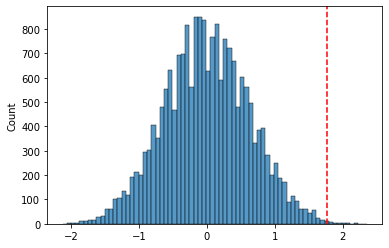

mu_diff: 1.78


In [8]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('mu_diff:', round(mu_diff, 2))

It's finally time to compute the **[p-value](https://en.wikipedia.org/wiki/P-value)**. The p-value is an often misunderstood concept, so let's spend a couple of words on it. According to its definition on Wikipedia: 

> The p-value is the **probability** of obtaining **test results** at least **as extreme as** the result **actually observed**, *under the assumption that the null hypothesis is correct*.

Let's unpack this definition: 

- the first thing to note is that **the p-value is a probability**, therefore it can only assume values in the range $[0, 1]$; 
- another important piece is the one at the end: *under the assumption that the null hypothesis is correct*; if you recall, the null hypothesis stated that the mean of the two groups was the same and we generated the data in the histogram with this idea (we randomly shuffled the data from the two groups as if they had no difference); 
- the **test results** are the differences between the sampled means of the two groups that we calculated in the resampling loop (200 iterations); 
- the result **actually observed** is the difference between the means of the treatment and control groups that we calculated earlier and that we stored in the `mu_diff` object; 
- finally, the p-value is the probabiliy of observing test results **at least as extreme as** the result actually observed; in simple terms this means that we need to **count how many** test results were >= than the `mu_diff` we observed and divide this number by the total number of test results we computed (200 in our case).

Here's a visual explanation of what a p-value is: 

<img src="img/p-value.png" width="600">

Let's count how many times the sampled test results were >= than the actual observed result: 

In [9]:
sum(mu_diff_samples>mu_diff)

34

Only one observation from our resampling procedure had a result as extreme as the one observed; let's divide it by the total number of samples (200) in order to find the probability:

In [10]:
p_value = sum(mu_diff_samples>mu_diff)/n
print('p-value: ', p_value)

p-value:  0.0017


Now, is a p-value of 0.005 (it can also be read in percentage terms as 0.5%) good or bad? Statisticians don't like the idea of leaving to the researcher or analyst the decision of determining whether a result is “too unusual” to happen by chance, therefore **a threshold is specified in advance**, as in “the observed value is more extreme than 5% of the chance results (under $H_0$)”; **this threshold is known as alpha** or as the [significance level](https://en.wikipedia.org/wiki/Statistical_significance). 

Typical alpha levels are 10%, 5% and 1% (the lower the alpha level, the more stringent the test is), with 5% being the most widely used. 

> Any chosen level is an arbitrary decision; there is nothing about the process that will guarantee correct decisions x% of the time. This is because the probability question being answered is not "what is the probability that this happened by chance?" but rather "given a chance model (under $H_0$), what is the probability of a result this extreme?" 

We choose an alpha level of 5% (that is, $\alpha = 5\%$) and thus compare our p-value to this significance level: 

- if $p-value > \alpha$: we **accept the null hypothesis** $H_0$ that the result we observed is no different from a chance result; 
- if $p-value <= \alpha$: we **reject the null hypothesis** $H_0$ and we say that the observed result (the difference in means between the two groups) is **statistically significant**. 

In [11]:
alpha = 0.05
if p_value <= alpha: 
    print('p-value <= alpha | the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value <= alpha | the observed result is statistically significant | H0 rejected


In our example, the $p-value=0.005$ is well below the significance level $\alpha=0.05$, which means that if it's true that the product doesn't have the effect it advertises, then obtaining the observed difference between control and treatment groups by chance, occurs with a probability of only 0.5%. 

That's a very low probability. In fact, **at our 5% level of significance, we reject the null hypothesis** and accept the alternative: the new product does appear to be working.

***

Out of completeness, let's also see how to use a t-test to check for the difference in means between the `treatment` and `control` groups. Again, the null hypothesis is that the means of the two groups are the same and let's choose the sampe significance level of $\alpha=0.05$: 

In [12]:
stats.ttest_ind(treatment, control, alternative='greater')

Ttest_indResult(statistic=3.4149113236004656, pvalue=0.0012406913032118703)

In [13]:
alpha = 0.05
if stats.ttest_ind(treatment, control).pvalue <= alpha: 
    print('p-value <= alpha | the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value <= alpha | the observed result is statistically significant | H0 rejected


As you can see, the result is the same, although the test statistic and the p-value are different. Again, the difference between this method and the permutation test is that: 
- here we are assuming that the underlying distribution follows a Student's t-distribution and thus we compare the test statistic (that has been duly calculated with a [formula](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions)) with the theoretical values of the t-distribution; 
- in a permutation test, we make no assumptions about the data distribution and we compare the test statistic (calculated as the simple difference in means between groups) with the sampled distribution obtaind via the resampling method. 

### AB Tests

Although we've briefly mentioned them, AB tests are so frequently used in business, academy and research that it is worth spending a bit more time talking about them. As you will see, we now have all the tools necessary to easily takle them: the design of an experiment and the process of hypothesis testing. 

An **[AB test](https://en.wikipedia.org/wiki/A/B_testing)** is an **experiment with two groups** to establish which of two drugs, features, products or the like is better. Often one of the two groups (the control) represents the status-quo. A **typical hypothesis** is that **treatment is better than control**, representing a [one-tail test](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests). 

AB tests are common in (but not limited to) online businesses and marketing, since the experiment workflow is easily designed and results are readily measured. Below are some examples:
- Testing two cart pages to determine which produces more conversions 
- Testing two paid search ads to determine which generates more clicks
- Testing two drugs to determine which suppresses symptoms more effectively 
- Testing two soil treatments to determine which produces better seed germination 

In an AB test, **subjects** are randomly assigned to groups A and B; the subjects might be web visitors, a group of people, plant seeds and so on; the key idea is that some of the subjects are exposed to the treatment, while others are exposed to the control. 

The **randomisation process** is key, since this way you know that any difference between groups is due to either:
- the effect of the different treatments
- the effect of chance, that is the random assignment resulted in the better-performing subjects being concentrated in A or B

Particular attention needs to be placed in the **test statistic or metric** used to compare the two groups. One of the most common metrics in a business context is a **binary variable**: 
- the visitor clicked or not 
- the customer purchased or not 
- the transaction resulted in a fraud or not 

Let's see a practical example. You're a data analyst at an e-commerce and the product team wants to redesign the call-to-action of the website's home page to, hopefully, increase click-through rate. Here are a few important pointers and steps in the design and execution of the experiment: 

1. the current proportion of people who click on the call-to-action is about 23% of visitors; 
2. you're hoping to reach at least a 10% absolute increase, reaching a new click-through rate of about 33% with the new redesign; 
3. using an [online calculator](https://www.evanmiller.org/ab-testing/sample-size.html#!23;80;5;10;0), you find out that you'll need a sample size of at least 288 observations per group (control and test); 
4. you set-up the test and divert 50% of the website's traffic to the home page with the new call-to-action (test group), while the remaining 50% will continue seeing the usual CTA (control group); 
5. you let the test run for the [appropriate amount of time](https://www.abtasty.com/blog/how-long-run-ab-test/), according to your iindustry knowledge and business cycle; 
6. finally, you collect the data and are ready to analyse it. 

We will perform a **permutation test** to assess wether there is a statistically significant difference between the click-through rates of the two groups; in particular, our **null hypothesis** is that there is no difference between the CTR of the two groups, which we hope to reject in favor of the **one-tail alternative** that the CTR of the test group is higher than the control group: 
- $H_0: CTR_{test} = CTR_{control}$
- $H_1: CTR_{test} > CTR_{control}$

You can see our dataset in the `ab` DataFrame, where we have an `id` and `visit_date` columns indicating the single visits, the `group` variable tells us which group that visit was assigned to and finally the `clicked` column indicates if that visitor clicked or not on the call-to-action button. 

In [33]:
ab = pd.read_csv("data/ab-test-data.csv")
ab.head()

,id,visit_date,group,clicked
0,1,2018-01-01,control,0
1,2,2018-01-01,control,1
2,3,2018-01-01,control,0
3,4,2018-01-01,control,0
4,5,2018-01-01,test,0


There are no missing values and all the data is in the correct format. 

In [34]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          588 non-null    int64 
 1   visit_date  588 non-null    object
 2   group       588 non-null    object
 3   clicked     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB


Let's compute a few **descriptive statistics**, where we can see that: 
- we have a total of 294 observations per group (more than needed to prove a 10% absolute increase); 
- we can already see that the test group received more clicks than the control group; 
- notice that the test group reached a CTR well above the 33% mark we set earlier.

In [35]:
ab.groupby(['group'], as_index=False).agg({'clicked': ['count', 'sum', np.mean]})

group clicked               
             count  sum      mean
0  control     294   68  0.231293
1     test     294  113  0.384354

In [36]:
mu_test = np.mean(ab[ab.group=='test']['clicked'])
mu_control = np.mean(ab[ab.group=='control']['clicked'])

ab_mu_diff = mu_test - mu_control
print('Observed CTR difference:', round(ab_mu_diff, 4))

Observed CTR difference: 0.1531


Let's now compute the **permutation test** (the algorithm will be the same as the one we saw in the previous section) and plot the distribution of the resulting sampled statistics (in our case, the differences between the sampled CTRs): 

In [46]:
n = 2000
np.random.seed(1)
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = ab.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(ab.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = ab.iloc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['clicked']) - np.mean(df_sample2['clicked'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

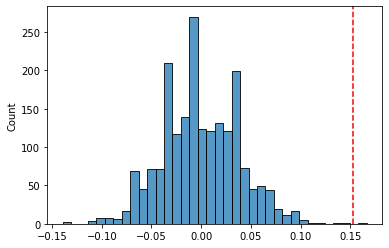

ab_mu_diff: 0.15


In [47]:
sns.histplot(mu_diff_samples)
plt.axvline(ab_mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('ab_mu_diff:', round(ab_mu_diff, 2))

In order to calculate the **p-value**, we compute the proportion of the number of sampled statistics that were as extreme or more extreme than the observed CTR difference between the test and control groups. As you can see from the result, there is only one, therefore the computed p-value is 0.0005. 

In [48]:
print('Values more extreme than observed:', sum([el >= ab_mu_diff for el in mu_diff_samples]))
p_value = sum([el > ab_mu_diff for el in mu_diff_samples])/n
print('p-value:', p_value)

Values more extreme than observed: 1
p-value: 0.0005


This means that, given an **alpha significance level** of 5%, we can safely **reject the null hypothesis** and conclude that the difference in CTR between the test and control groups is **statistically significant**. 

***

Out of completeness, let's also see how to reach the same results using a z-test:

In [40]:
from statsmodels.stats.weightstats import ztest as ztest
ab_ztest = ztest(x1=ab[ab.group=='test']['clicked'], 
                 x2=ab[ab.group=='control']['clicked'], 
                 alternative='larger')
ab_ztest

(4.069841267110652, 2.3522590065127384e-05)

In [41]:
print('p-value:', ab_ztest[1])

p-value: 2.3522590065127384e-05


Since the p-value is lower than the $\alpha = 0.5$ (it's practically very close to zero), we can safely reject the null hypothesis and make the same conclusions as above. 